# IMBD top movies scraper bot
using web scraping automation


In [1]:
import requests # web page collect
import pandas   # data save and processing
from bs4 import BeautifulSoup # extraction

In [2]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"

## what to extract and what tags we want to select?
- main area -> tbody.lister-list
- one movie row -> tr
- name and  year -> td.titleColumn
- rating -> strong

In [3]:
def get_page(url):
    # this function gets the page data for extraction
    page = requests.get(url)
    if page.status_code == 200:
        print("success") 
        return BeautifulSoup(page.text)
    else:
        print("error occurred")

In [14]:
def extract_movies(soup):
    # main function to get the data we want from top movie page
    movies = [] # empty list
    target = soup.find('tbody',{'class':'lister-list'})
    for movie in target.find_all('tr'):
        name = movie.find('td',{'class':'titleColumn'}).a.text
        year = movie.find('td',{'class':'titleColumn'}).span.text[1:-1]
        rating = movie.find('strong').text

        movies.append({
            'title':name, 'year':int(year),'stars': float(rating)
        })
    print('movies data collected!')
    return movies

In [15]:
def save_data(movies):
    data =  pandas.DataFrame(movies) # make data into tabular format
    data.to_csv('imbd_top_movies.csv')
    print("data saved successfully!")
    return data

## using/calling the functions to collect and save data

In [16]:
soup = get_page(url)
movielist = extract_movies(soup)
data = save_data(movielist)

success
movies data collected!
data saved successfully!


In [17]:
data

,title,year,stars
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9
...,...,...,...
245,Demon Slayer: Mugen Train,2020,8.0
246,Raatchasan,2018,8.0
247,Sunrise,1927,8.0
248,Nights of Cabiria,1957,8.0


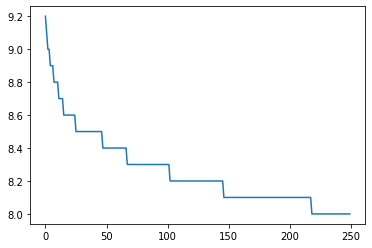

In [19]:
data['stars'].plot(kind='line')